In [1]:
ssssimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [11]:
df = pd.read_csv('forecast_data.csv')
df.head(10)
print(df['STATION'].unique())
df.drop(['STATION'], axis=1, inplace=True) # Just have one Station USW00014765
df.head(10)

['USW00014765']


,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
5,2005-01-06,30.0,25,35,8.72,15.0,1.0,NaN,NaN,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
6,2005-01-07,33.0,28,37,8.72,23.9,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-01-08,32.0,29,34,6.04,17.0,1.0,NaN,NaN,1.0,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
8,2005-01-09,31.0,28,34,6.04,15.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
9,2005-01-10,37.0,31,43,6.71,17.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Fill all null values to 0

In [12]:
df['TAVG'] = np.where(pd.isnull(df['TAVG']), (df['TMIN'] + df['TMAX']) / 2, df['TAVG'])
df[['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22']] = df[['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22']].fillna(0.0)
df['DATE'] = pd.to_datetime(df['DATE'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    4017 non-null   datetime64[ns]
 1   TAVG    4017 non-null   float64       
 2   TMIN    4017 non-null   int64         
 3   TMAX    4017 non-null   int64         
 4   AWND    4017 non-null   float64       
 5   WSF2    4017 non-null   float64       
 6   WT01    4017 non-null   float64       
 7   WT02    4017 non-null   float64       
 8   WT03    4017 non-null   float64       
 9   WT04    4017 non-null   float64       
 10  WT05    4017 non-null   float64       
 11  WT06    4017 non-null   float64       
 12  WT07    4017 non-null   float64       
 13  WT08    4017 non-null   float64       
 14  WT09    4017 non-null   float64       
 15  WT10    4017 non-null   float64       
 16  WT11    4017 non-null   float64       
 17  WT13    4017 non-null   float64       
 18  WT14    

In [4]:
font = {'family': 'monospace', 'color': 'white', 'weight': 'bold', 'size': 14} # Custom font for labels and titles

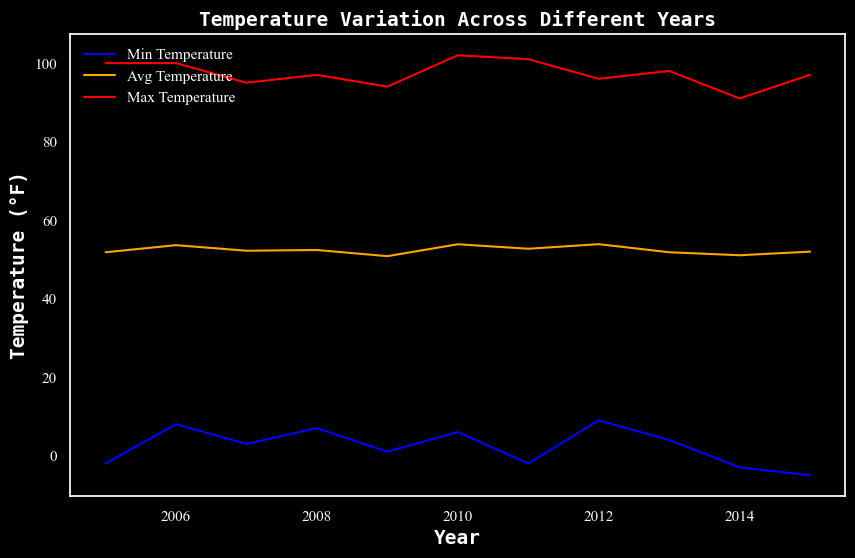

In [27]:
df['YEAR'] = df['DATE'].dt.year
df_yearly = df.groupby('YEAR').agg({'TAVG': 'mean', 'TMIN': 'min', 'TMAX': 'max'})

fig, ax = plt.subplots(figsize=(10, 6))

plt.style.use('dark_background')

plt.title('Temperature Variation Across Different Years', fontdict=font)
plt.xlabel('Year', fontdict=font)
plt.ylabel('Temperature (°F)', fontdict=font)

ax.plot(df_yearly.index, df_yearly['TMIN'], color='blue', label='Min Temperature')
ax.plot(df_yearly.index, df_yearly['TAVG'], color='orange', label='Avg Temperature')
ax.plot(df_yearly.index, df_yearly['TMAX'], color='red', label='Max Temperature')

plt.legend(loc='upper left', frameon=False)

plt.show()

##### Temperature range tends to increase (TMIN low TMAX high) by year.

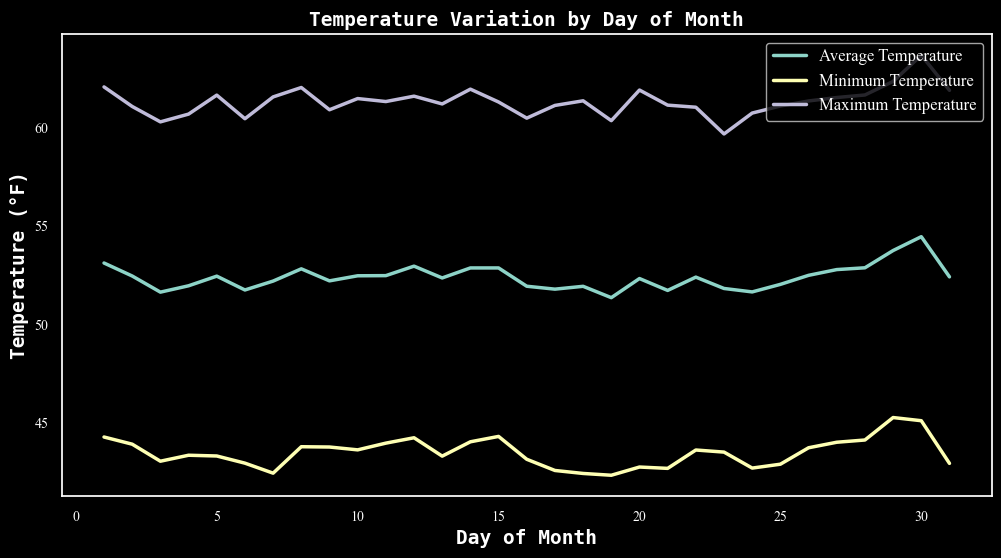

In [30]:
df['day_of_month'] = df['DATE'].dt.day

df_monthly = df.groupby('day_of_month')[['TAVG', 'TMIN', 'TMAX']].mean().reset_index()

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='day_of_month', y='TAVG', data=df_monthly, label='Average Temperature', linewidth=2.5)
sns.lineplot(x='day_of_month', y='TMIN', data=df_monthly, label='Minimum Temperature', linewidth=2.5)
sns.lineplot(x='day_of_month', y='TMAX', data=df_monthly, label='Maximum Temperature', linewidth=2.5)

# Set the axis labels, title, and legend
ax.set_xlabel('Day of Month', fontdict=font)
ax.set_ylabel('Temperature (°F)', fontdict=font)
ax.set_title('Temperature Variation by Day of Month', fontdict = font)
ax.legend(fontsize=12, loc='upper right')

ax.tick_params(labelsize=10, colors='white')

plt.show()

##### The middle days of the month (17 - 19) have relatively low temperatures, the last days of the month (28 - 30) tend to have high temperatures.

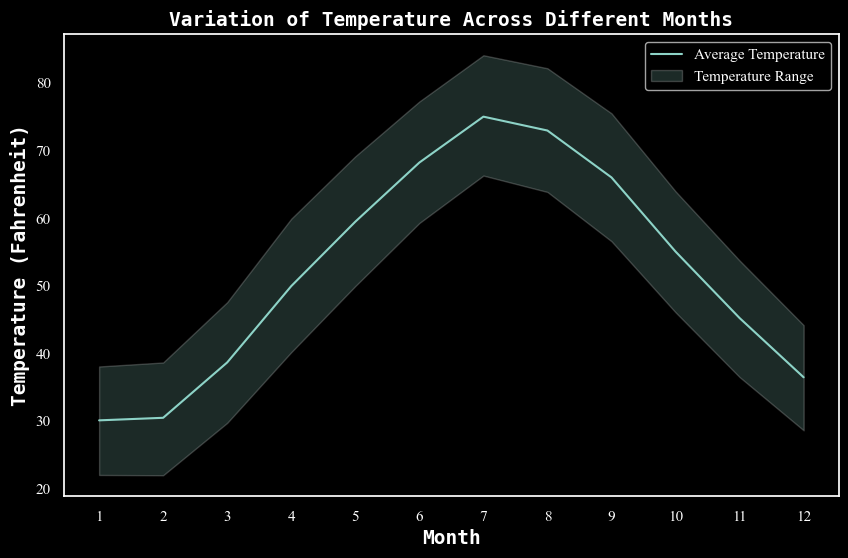

In [31]:
df['DATE'] = pd.to_datetime(df['DATE'])

df['Month'] = df['DATE'].dt.month

grouped_data = df.groupby('Month')[['TAVG', 'TMIN', 'TMAX']].mean()

plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(grouped_data['TAVG'], label='Average Temperature')
plt.fill_between(grouped_data.index, grouped_data['TMIN'], grouped_data['TMAX'], alpha=0.2, label='Temperature Range')
plt.title('Variation of Temperature Across Different Months', fontdict=font)
plt.xlabel('Month',fontdict=font)
plt.ylabel('Temperature (Fahrenheit)', fontdict=font)
plt.xticks(range(1,13))
plt.legend()
plt.show()

##### The climate of this Station is Continental, with cold winters and hot summers

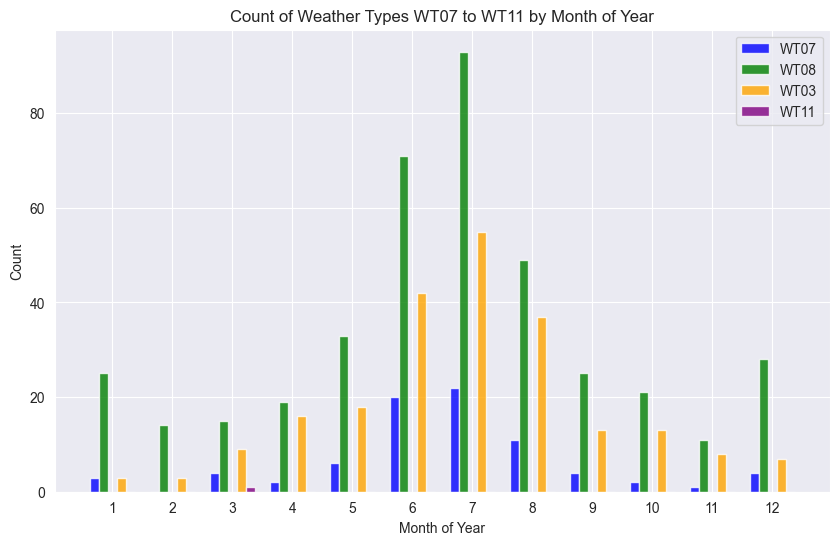

In [43]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month

# Select weather type columns
wt_cols = ['WT07', 'WT08', 'WT03', 'WT11']

# Group by month and count occurrences of each weather type
counts = df.groupby('MONTH')[wt_cols].sum().reset_index()

# Set the width of each bar
bar_width = 0.15

# Set the positions of the x ticks
r1 = range(len(counts))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create multi bar chart
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.bar(r1, counts['WT07'], width=bar_width, color='blue', alpha=0.8, label='WT07')
ax.bar(r2, counts['WT08'], width=bar_width, color='green', alpha=0.8, label='WT08')
ax.bar(r4, counts['WT03'], width=bar_width, color='orange', alpha=0.8, label='WT03')
ax.bar(r5, counts['WT11'], width=bar_width, color='purple', alpha=0.8, label='WT11')

# Add x-axis ticks and labels
ax.set_xticks([r + bar_width*2 for r in range(len(counts))])
ax.set_xticklabels(counts['MONTH'])

# Add legend and title
ax.legend()
ax.set_xlabel('Month of Year')
ax.set_ylabel('Count')
ax.set_title('Count of Weather Types WT07 , WT08, WT03, WT11 by Month of Year')

plt.show()

#####    WT07: Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction.
#####    WT08: Smoke or haze.
#####    WT03: Thunder.
#####    WT11: High or damaging winds.
#####    These weather are related to temperature, as the temperature increases, the frequency of their occurrence also increases.

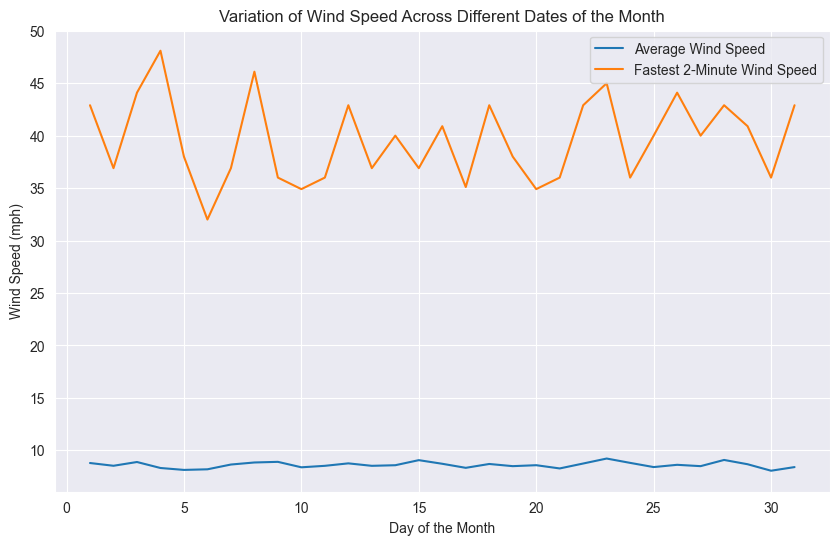

In [35]:
df['DAY'] = pd.DatetimeIndex(df['DATE']).day

wind_speeds = df.groupby('DAY')[['AWND', 'WSF2']].agg(['mean', 'max'])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(wind_speeds.index, wind_speeds['AWND']['mean'], label='Average Wind Speed')
ax.plot(wind_speeds.index, wind_speeds['WSF2']['max'], label='Fastest 2-Minute Wind Speed')
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Wind Speed (mph)')
ax.set_title('Variation of Wind Speed Across Different Dates of the Month')
ax.legend()

plt.show()

##### The wind blows frequently in here.

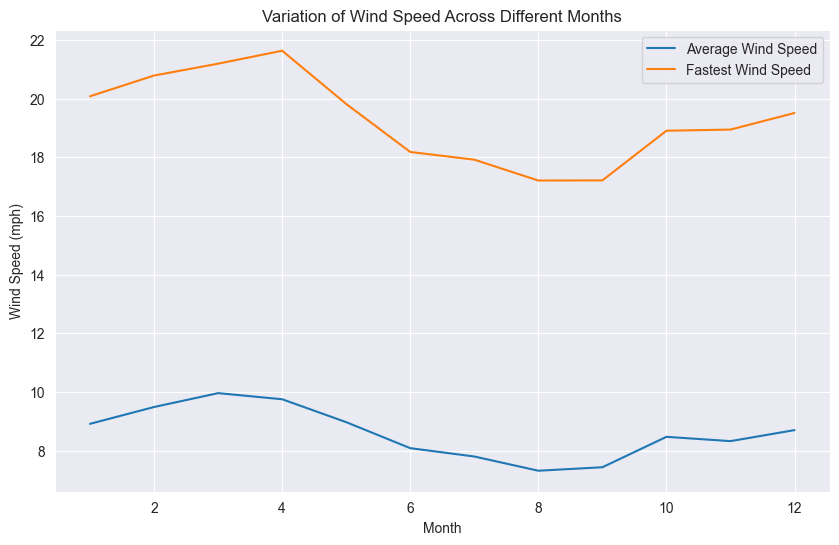

In [34]:
months = df['MONTH']
awnd = df['AWND']
wsf2 = df['WSF2']

awnd_by_month = df.groupby('MONTH')['AWND'].mean()
wsf2_by_month = df.groupby('MONTH')['WSF2'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(awnd_by_month.index, awnd_by_month.values, label='Average Wind Speed')
ax.plot(wsf2_by_month.index, wsf2_by_month.values, label='Fastest Wind Speed')

ax.set_xlabel('Month')
ax.set_ylabel('Wind Speed (mph)')

ax.set_title('Variation of Wind Speed Across Different Months')
ax.legend()

plt.show()

##### The wind speed chart here is consistent with the above conclusion :"The climate of this Station is Continenta"

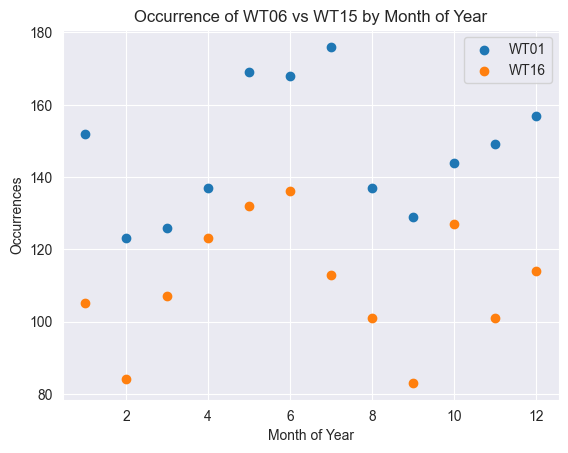

In [18]:

plt.scatter(wt01_by_month.index, wt01_by_month.values, label='WT01')
plt.scatter(wt16_by_month.index, wt16_by_month.values, label='WT16')

plt.title('Occurrence of WT06 vs WT15 by Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Occurrences')

plt.legend()

plt.show()

##### WT06: Glaze or rime.
##### WT15: Freezing drizzle.
##### The frequency of these two types of increase and decrease is quite similar

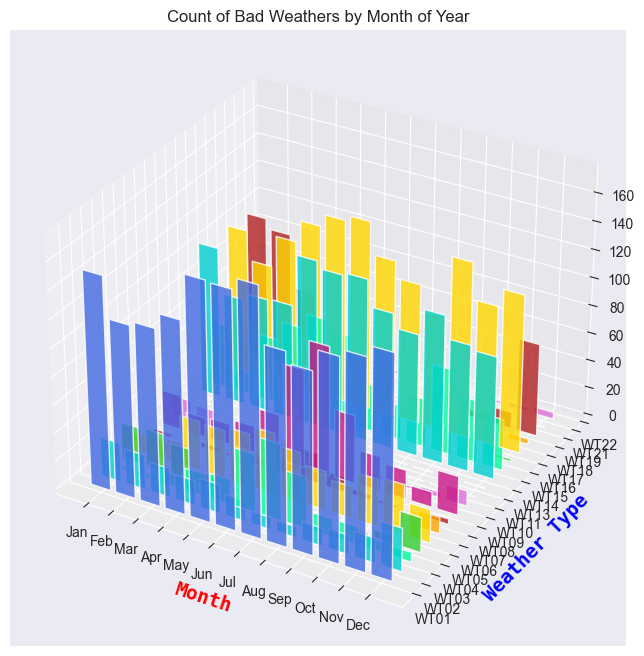

In [33]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month

wt_cols = ['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22']

counts = df.groupby('MONTH')[wt_cols].sum().reset_index()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['royalblue', 'darkturquoise', 'mediumspringgreen', 'limegreen', 'gold', 'orange',
          'firebrick', 'mediumvioletred', 'orchid', 'slategray', 'darkblue', 'darkturquoise',
          'mediumspringgreen', 'limegreen', 'gold', 'orange', 'firebrick', 'mediumvioletred',
          'orchid', 'slategray', 'blueviolet', 'slategray']

for i in range(19):
    ax.bar(counts['MONTH'], counts.iloc[:,i+1], zs=i, zdir='y', color=colors[i], alpha=0.8)

ax.set_xlabel('Month', fontdict=font, color= 'red')
ax.set_ylabel('Weather Type',fontdict=font, color= 'blue')
ax.set_zlabel('Count',fontdict=font)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_yticks(range(20))
ax.set_yticklabels(counts.columns[1:])
ax.set_title('Count of Bad Weathers by Month of Year')

plt.show()

##### Overview all Bad Weathers by Month of Year

In [ ]:
####